<a href="https://colab.research.google.com/github/mrigendra-sudo/practice_jupyter_notebooks/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision import *

     |████████████████████████████████| 727kB 6.5MB/s 
     |████████████████████████████████| 194kB 21.3MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 1.2MB 22.1MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
Mounted at /content/gdrive


In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'Azure key')

In [4]:
search_images_bing

<function fastbook.search_images_bing>

In [5]:
results = search_images_bing(key,"good face")
lms = results.attrgot('content_url')
len(lms)

150

In [71]:
face_types = ['happy','angry']
path = Path('Person')

In [72]:
if not path.exists():
    path.mkdir()
    for o in face_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} person')
        download_images(dest, urls=results.attrgot('contentUrl'),n_workers=0)

In [77]:
dest = (path/'sad')       
results = search_images_bing(key,  'sad person')
download_images(dest, urls=results.attrgot('contentUrl'),n_workers=0)

In [78]:
fns = get_image_files(path)
fns

(#414) [Path('Person/happy/00000011.jpg'),Path('Person/happy/00000069.jpg'),Path('Person/happy/00000000.jpg'),Path('Person/happy/00000092.png'),Path('Person/happy/00000147.jpg'),Path('Person/happy/00000131.jpg'),Path('Person/happy/00000032.jpg'),Path('Person/happy/00000101.jpg'),Path('Person/happy/00000087.jpg'),Path('Person/happy/00000070.jpg')...]

In [79]:
failed = verify_images(fns)
failed

(#11) [Path('Person/happy/00000138.jpg'),Path('Person/happy/00000118.jpg'),Path('Person/sad/00000018.jpg'),Path('Person/sad/00000025.jpg'),Path('Person/sad/00000097.jpg'),Path('Person/angry/00000038.jpg'),Path('Person/angry/00000091.jpg'),Path('Person/angry/00000072.jpg'),Path('Person/angry/00000103.jpg'),Path('Person/angry/00000058.jpg')...]

In [80]:
failed.map(Path.unlink);

In [90]:
faces = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(size=128))

In [91]:
dls = faces.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


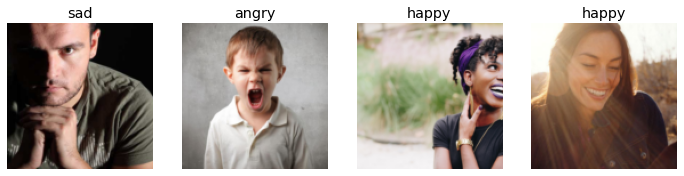

In [92]:
dls.valid.show_batch(max_n=4,nrows=1)

In [93]:
faces = faces.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = faces.dataloaders(path)

In [94]:
learn = cnn_learner(dls,arch=resnet50,metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.769990,2.600063,0.425000,03:39


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.871312,1.121359,0.312500,04:41
1,0.677869,1.312644,0.312500,04:47
2,0.557461,1.265164,0.262500,04:49
3,0.482181,1.087343,0.212500,04:51


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


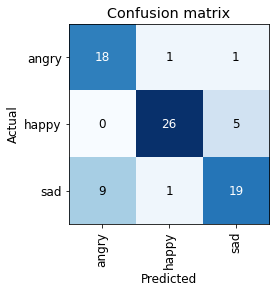

In [96]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

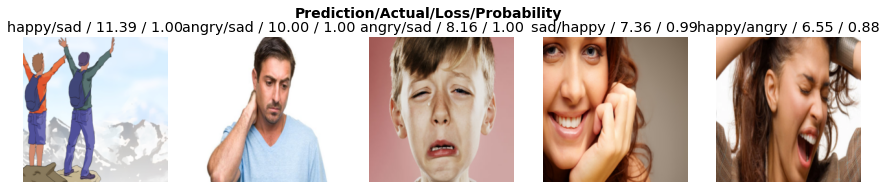

In [97]:
interp.plot_top_losses(5, nrows=1)

In [98]:
learn.export()

In [99]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [100]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('/content/Person/angry/00000002.jpg')

('angry', tensor(0), tensor([9.9150e-01, 8.4828e-03, 1.6493e-05]))